# 构建模型
参考文献：

[2-3]Channel Estimation for IRS-Assisted Millimeter-Wave MIMO Systems：Sparsity-Inspired Approaches

[2-2]Channel Estimation for RIS-Aided Multiuser Millimeter-Wave Massive MIMO Systems



In [8]:
import numpy as np
import math, cmath
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(1234)

## system parameters
BS has a $N$ antannes ULA

RIS has a $M$ antannes ULA

$K$ single antanna users



In [9]:
class system_parameters():
    def __init__(self, N=64, M=64, K=4, L=5, J=4) -> None:
        self.N = N
        self.M = M
        self.K = K
        self.fc = 28e9  # frequence
        self.lambda_c = 3e8/self.fc
        self.sigma_BR = 2.2 # shadow factor for RIS-BS link 
        self.sigma_RU = 2.8 # shadow factor for RIS-User link

        

$$
\mathbf{a}_{X}(x)=\left[1, e^{-\mathrm{i} 2 \pi x}, \ldots, e^{-\mathrm{i} 2 \pi(X-1) x}\right]^{\mathrm{T}}
$$
where $X \in\{M, N\}$ and $x \in\left\{\omega_{l}, \psi_{l}, \varphi_{k, j}\right\} . \omega_{l}=\frac{d_{\mathrm{RIS}}}{\lambda_{c}} \cos \left(\theta_{l}\right), \psi_{l}=\frac{d_{\mathrm{BS}}}{\lambda_{c}} \cos \left(\phi_{l}\right)$, and $\varphi_{k, j}=$ $\frac{d_{\text {RIS }}}{\lambda_{c}} \cos \left(\vartheta_{k, j}\right)$ are the directional cosine with $\theta_{l}$ and $\phi_{l}$ denoting the AoD and AoA of the $l$-th spatial path from RIS to BS, respectively, and $\vartheta_{k, j}$ as the AoA of the $j$-th spatial path from user $k$ to RIS. $\lambda_{c}$ is the carrier wavelength. 

test ULA_array_response


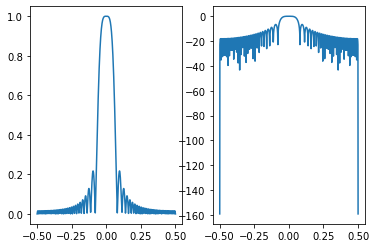

In [10]:
def ULA_array_response(X, theta, d, lambda_c):
    # Input:
        # X: the dimension of the array, int
        # theta: the AoA/AoD of the in/out signal, float(0~$\pi$)
        # d: array interval
        # lambda_c: carrier wave length

    # Output:
        # alpha: the array response
    alpha = np.array(X*[0+1j])
    for x in range(X):
        phase = 2*math.pi*x*(d/lambda_c)*math.cos(theta)
        alpha[x] = cmath.exp(-1j * phase)
    return np.mat(alpha).T

# when f_c = 28GHz, lamda= 3e8 / f_c = 3e8/ 28e9
print("test ULA_array_response")
# print(ULA_array_response(8, math.pi/2, 3e8/28e9 /2, 3e8/28e9))
# print(ULA_array_response(8, math.pi, 3e8/28e9 /2, 3e8/28e9))
# print(ULA_array_response(8, 0, 3e8/28e9 /2, 3e8/28e9))
x = np.linspace (-np.pi/2 , np.pi/2 , 1000)
y = np.array([np.abs((ULA_array_response(64, theta, 3e8/28e9 /2, 3e8/28e9).H * ULA_array_response(64, 0, 3e8/28e9 /2, 3e8/28e9))[0,0]) for theta in x])/64
plt.subplot(1,2,1)
plt.plot(x/np.pi,y)
plt.subplot(1,2,2)

plt.plot(x/np.pi,10*np.log10((np.array(y))))

# channel generation
## generate $\alpha_{l}$
$$
\alpha_{l} \sim \mathcal{C} \mathcal{N}\left(0,10^{-3} d_{\mathrm{BR}}^{-2.2}\right)
$$
## generate $\beta_{k,j} $
$$
\beta_{k, j} \sim \mathcal{C N}\left(0,10^{-3} d_{\mathrm{RU}}^{-2.8}\right)
$$

## generate AoA $\phi_{l}$, AoD $w_l$, AoA $\vartheta_{k, j}$
$$
\omega_{l}, \psi_{l}, \varphi_{k, j}
$$
$$
\left\{\phi_{l}, \theta_{l}, \vartheta_{k, j}\right\} \text { are continuous and uniformly distributed over }[0, \pi)
$$

## the channels:

- $k$-th user to the RIS ${\bf h}_k \in \mathbb{C}^{M \times 1}$
$$
\mathbf{h}_{k}=\mathbf{A}_{M, k} \boldsymbol{\beta}_{k}
$$
- RIS to the BS:    ${\bf H} \in \mathbb{C}^{N \times M}$
$$
\mathbf{H}=\mathbf{A}_{N} \Lambda \mathbf{A}_{M}^{\mathrm{H}}
$$
- cascaded channel $\mathbf{G}_{k}=\operatorname{HDiag}\left(\mathbf{h}_{k}\right) \in \mathbb{C}^{N \times M}$
- angle-domain expression: $\mathbf{G}_{k}=\mathbf{A}_{N} \boldsymbol{\Lambda} \mathbf{A}_{M}^{\mathrm{H}} \operatorname{Diag}\left(\mathbf{A}_{M, k} \boldsymbol{\beta}_{k}\right)$
$$
\begin{aligned}
\mathbf{A}_{N} &=\left[\mathbf{a}_{N}\left(\psi_{1}\right), \ldots, \mathbf{a}_{N}\left(\psi_{L}\right)\right] \in \mathbb{C}^{N \times L} \\
\boldsymbol{\Lambda} &=\operatorname{Diag}\left(\alpha_{1}, \alpha_{2}, \ldots, \alpha_{L}\right) \in \mathbb{C}^{L \times L} \\
\mathbf{A}_{M} &=\left[\mathbf{a}_{M}\left(\omega_{1}\right), \ldots, \mathbf{a}_{M}\left(\omega_{L}\right)\right] \in \mathbb{C}^{M \times L}
\end{aligned}
$$
$$
\begin{aligned}
\mathbf{A}_{M, k} &=\left[\mathbf{a}_{M}\left(\varphi_{k, 1}\right), \ldots, \mathbf{a}_{M}\left(\varphi_{k, J_{k}}\right)\right] \in \mathbb{C}^{M \times J_{k}} \\
\boldsymbol{\beta}_{k} &=\left[\beta_{k, 1}, \ldots, \beta_{k, J_{k}}\right]^{\mathrm{T}} \in \mathbb{C}^{J_{k} \times 1}
\end{aligned}
$$

In [11]:
def userk_to_RIS_channel_generation(A_MK, beta_k):
    # input 
        # A_Mk, array, complex, M times J_k
        # beta_k, array, complex, J_k times 1
    # output
        # h_k, array, complex, M tims 1
    h_k = np.dot(A_MK, beta_k)
    return h_k

def RIS_to_BS_channel_generation(A_N, Lambda, A_M):
    # input
        # A_N, array, complex, N times L
        # Lambda, array, complex, L times L
        # A_M, array, complex, M times L
    # output
        # H, array, complex, N times M
    H = np.dot(np.dot(A_N, Lambda), A_M)
    return H

def cascaded_channel_generation(H, h_k):
    # input：
        # H, array, complex, N times M
        # h_k, array, complex, M tims 1
    # output:
        # G_k, array, complex, N times M
    G_k = np.dot(H, np.diagflat(h_k))
    return G_k

def A_MK_generation(J_k, M, d, lambda_c):
    # input:
        # J_k, int
        # M, int, ant number of the BS
        # d: array interval
        # lambda_c: carrier wave length
    # output:
        # A_Mk, array, complex, M times J_k
        # varphi, array, float(in arc), J_k times 1
    varphi = np.random.rand(J_k,1) * np.pi
    A_Mk = np.array([ULA_array_response(M, angle, d, lambda_c) for angle in varphi])

    return A_Mk, varphi

def beta_k_generation(J_k, d_RU, sigma_RU= 2.8):
    # input:
        # J_k, int
        # d_RU, distance between RIS and BS
        # sigma_RU, mmWave channel path loss fluctuation
    # output:
        # beta_k, array, complex, J_k times 1 
    
    return 0

def A_N_generation():
    return 0

def Lambda_generation():
    return 0

def A_M_generation():
    return 0

def channel_generation(omega, psi, varphi):
    # input:
        # omega, array, float(in arc), L times 1
        # psi, array, float(in arc), L times 1
        # varphi, array, float(in arc), J_k times 1
    # output:
        # G_k, array, complex, N times M

    return 0

In [12]:
A_MK_generation(4,8, 3e8/28e9/2, 3e8/28e9)


(array([[[ 1.        -0.j        ],
         [-0.8516341 -0.52413677j],
         [ 0.45056129+0.8927455j ],
         [ 0.08420738-0.99644825j],
         [-0.59398905+0.80447313j],
         [ 0.92751528-0.37378525j],
         [-0.98581823-0.1678166j ],
         [ 0.75159758+0.65962192j]],
 
        [[ 1.        +0.j        ],
         [ 0.38478351+0.92300685j],
         [-0.7038833 +0.71031564j],
         [-0.92646889-0.37637136j],
         [-0.00909661-0.99995863j],
         [ 0.91946844-0.39316382j],
         [ 0.7166892 +0.69739271j],
         [-0.36792807+0.92985426j]],
 
        [[ 1.        -0.j        ],
         [ 0.81925274-0.5734326j ],
         [ 0.3423501 -0.93957246j],
         [-0.25831022-0.96606202j],
         [-0.76559282-0.64332545j],
         [-0.9961178 -0.08803026j],
         [-0.86655166+0.4990874j ],
         [-0.42373183+0.90578769j]],
 
        [[ 1.        +0.j        ],
         [-0.77277974+0.63467431j],
         [ 0.19437705-0.98092689j],
         [ 0.472358